source: https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d

In [ ]:
!pip install opencv-python

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

##### Reading the Image as grayscale to get rid of the channels

In [84]:
cat_img = cv2.imread("images/cat.jpg", cv2.IMREAD_GRAYSCALE)

In [85]:
cat_img.shape

(393, 590)

In [86]:
m, n = cat_img.shape

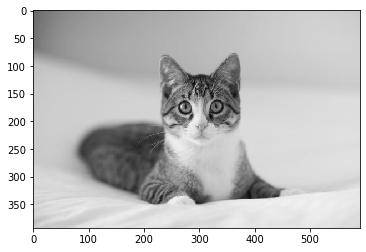

In [87]:
plt.imshow(cat_img, cmap='gray')

### Singular Value Decomposition

In [88]:
U, s, VT = la.svd(cat_img)

In [89]:
print("Left Singular Vectors Matrix: ", U.shape)
print("Singular Values", s.shape)
print("Right Singular Vectors Matrix", VT.shape)

Left Singular Vectors Matrix:  (393, 393)
Singular Values (393,)
Right Singular Vectors Matrix (590, 590)


##### s is a list of singular values. We convert it to an m x n matrix Sigma

In [90]:
Sigma = np.zeros(shape=(m, n))

In [91]:
# number of singular values
n_singular_values = s.shape[0]

# filling Sigma with the singular values
Sigma[:n_singular_values, :n_singular_values] = np.diag(s)

#### Approximating the Image using only first K singular values

In [103]:
k = 20
u_approx = U[:, :k]
sigma_approx = Sigma[:k, :k]
vt_approx = VT[:k, :]
uxsigma = np.matmul(u_approx, sigma_approx)
mat_approx = np.matmul(uxsigma, vt_approx)

In [104]:
mat_approx.shape

(393, 590)

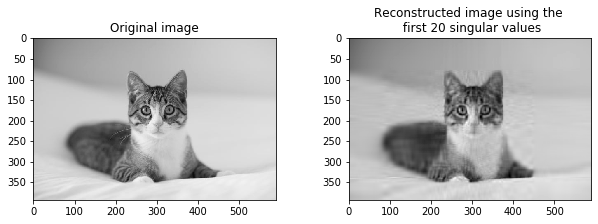

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1 = axes[0]
ax2 = axes[1]

ax1.imshow(cat_img, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

#### Visualizing Matrix Components
we know that a Matrix can be decomposed as:
$M = \sigma_{1}\mathbf{{u_{1}}}\mathbf{{v_{1}}}^T + \sigma_{2}\mathbf{{u_{2}}}\mathbf{{v_{2}}}^T + ...$
And each of them can be considered as a 'component' of Matrix along the singular vector. Each of these component has a rank of 1 which means there is only one Independent column and the other columns are a combination of this column. This is evident from the below figure on visualization of components

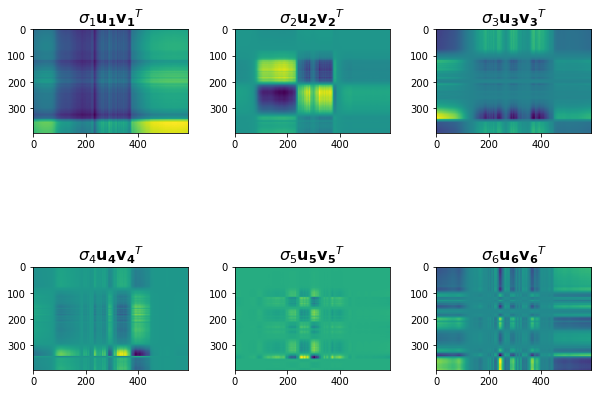

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

#### SVD on a simple Image

In [169]:
blank_img = np.zeros(shape=(500, 500))

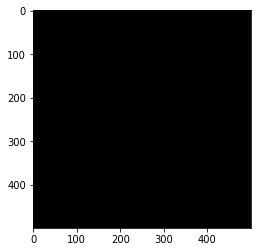

In [170]:
plt.imshow(blank_img, cmap='gray')

##### Add Rectangle

In [171]:
blank_img = cv2.rectangle(blank_img, (100, 100), (400, 250), (255, 255, 255), -1)

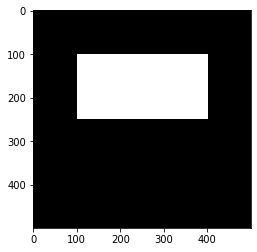

In [172]:
plt.imshow(blank_img, cmap='gray')

##### Add Circle

In [173]:
blank_img = cv2.circle(blank_img, (250, 375), 75, (255, 255, 255), -1)

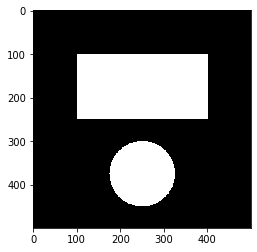

In [174]:
plt.imshow(blank_img, cmap='gray')

In [175]:
U, s, VT = la.svd(blank_img)

In [176]:
m, n = blank_img.shape

In [177]:
Sigma = np.zeros(shape=(m, n))

In [178]:
n_singular_values = len(s)
Sigma[:n_singular_values, :n_singular_values] = np.diag(s)

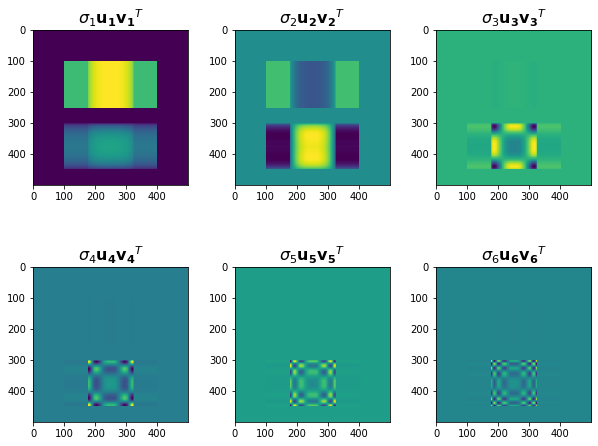

In [180]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

We observe that the first two components of the Matrix capture the rectangle and the other components focus on capturing the circle

## Source
All the code and ideas are taken from: https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d